In [90]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction import DictVectorizer
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import graphviz
from sklearn.tree import export_graphviz

## 加载数据及数据探索

In [67]:
train_df = pd.read_csv('./data/Titanic_Data-master/train.csv')
test_df = pd.read_csv("./data/Titanic_Data-master/test.csv")
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [68]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [69]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [70]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [71]:
train_df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Jonkoff, Mr. Lalio",male,NaN,NaN,NaN,1601,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [72]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## 数据清洗

In [73]:
test_df['Fare'].isnull().sum()

1

In [74]:
# 填充缺失值
train_df['Age'].fillna(train_df['Age'].mean(),inplace=True)
test_df['Age'].fillna(test_df['Age'].mean(),inplace=True)
train_df['Fare'].fillna(train_df['Fare'].mean(), inplace=True)
test_df['Fare'].fillna(test_df['Fare'].mean(), inplace=True)

In [75]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [76]:
train_df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [77]:
test_df['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [78]:
# 使用登录最多的港口来填充登录港口的 nan 值
train_df['Embarked'].fillna('S', inplace=True)
test_df['Embarked'].fillna('S', inplace=True)

## 特征选择

In [79]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [80]:
train_X = train_df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
train_y = train_df['Survived']
test_X = test_df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
train_X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.000000,1,0,7.2500,S
1,1,female,38.000000,1,0,71.2833,C
2,3,female,26.000000,0,0,7.9250,S
3,1,female,35.000000,1,0,53.1000,S
4,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.000000,0,0,13.0000,S
887,1,female,19.000000,0,0,30.0000,S
888,3,female,29.699118,1,2,23.4500,S
889,1,male,26.000000,0,0,30.0000,C


In [81]:
train_X.to_dict(orient='record')

[{'Pclass': 3,
  'Sex': 'male',
  'Age': 22.0,
  'SibSp': 1,
  'Parch': 0,
  'Fare': 7.25,
  'Embarked': 'S'},
 {'Pclass': 1,
  'Sex': 'female',
  'Age': 38.0,
  'SibSp': 1,
  'Parch': 0,
  'Fare': 71.2833,
  'Embarked': 'C'},
 {'Pclass': 3,
  'Sex': 'female',
  'Age': 26.0,
  'SibSp': 0,
  'Parch': 0,
  'Fare': 7.925,
  'Embarked': 'S'},
 {'Pclass': 1,
  'Sex': 'female',
  'Age': 35.0,
  'SibSp': 1,
  'Parch': 0,
  'Fare': 53.1,
  'Embarked': 'S'},
 {'Pclass': 3,
  'Sex': 'male',
  'Age': 35.0,
  'SibSp': 0,
  'Parch': 0,
  'Fare': 8.05,
  'Embarked': 'S'},
 {'Pclass': 3,
  'Sex': 'male',
  'Age': 29.69911764705882,
  'SibSp': 0,
  'Parch': 0,
  'Fare': 8.4583,
  'Embarked': 'Q'},
 {'Pclass': 1,
  'Sex': 'male',
  'Age': 54.0,
  'SibSp': 0,
  'Parch': 0,
  'Fare': 51.8625,
  'Embarked': 'S'},
 {'Pclass': 3,
  'Sex': 'male',
  'Age': 2.0,
  'SibSp': 3,
  'Parch': 1,
  'Fare': 21.075,
  'Embarked': 'S'},
 {'Pclass': 3,
  'Sex': 'female',
  'Age': 27.0,
  'SibSp': 0,
  'Parch': 2,
  'Far

In [82]:
# 向量化，
dvec = DictVectorizer(sparse=False)
train_X_1 = dvec.fit_transform(train_X.to_dict(orient='record'))
train_X_1 

array([[22.        ,  0.        ,  0.        , ...,  0.        ,
         1.        ,  1.        ],
       [38.        ,  1.        ,  0.        , ...,  1.        ,
         0.        ,  1.        ],
       [26.        ,  0.        ,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [29.69911765,  0.        ,  0.        , ...,  1.        ,
         0.        ,  1.        ],
       [26.        ,  1.        ,  0.        , ...,  0.        ,
         1.        ,  0.        ],
       [32.        ,  0.        ,  1.        , ...,  0.        ,
         1.        ,  0.        ]])

In [85]:
dvec.feature_names_

['Age',
 'Embarked=C',
 'Embarked=Q',
 'Embarked=S',
 'Fare',
 'Parch',
 'Pclass',
 'Sex=female',
 'Sex=male',
 'SibSp']

In [86]:
train_X_2 = pd.DataFrame(train_X_1,columns=dvec.feature_names_)
train_X_2

,Age,Embarked=C,Embarked=Q,Embarked=S,Fare,Parch,Pclass,Sex=female,Sex=male,SibSp
0,22.000000,0.0,0.0,1.0,7.2500,0.0,3.0,0.0,1.0,1.0
1,38.000000,1.0,0.0,0.0,71.2833,0.0,1.0,1.0,0.0,1.0
2,26.000000,0.0,0.0,1.0,7.9250,0.0,3.0,1.0,0.0,0.0
3,35.000000,0.0,0.0,1.0,53.1000,0.0,1.0,1.0,0.0,1.0
4,35.000000,0.0,0.0,1.0,8.0500,0.0,3.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
886,27.000000,0.0,0.0,1.0,13.0000,0.0,2.0,0.0,1.0,0.0
887,19.000000,0.0,0.0,1.0,30.0000,0.0,1.0,1.0,0.0,0.0
888,29.699118,0.0,0.0,1.0,23.4500,2.0,3.0,1.0,0.0,1.0
889,26.000000,1.0,0.0,0.0,30.0000,0.0,1.0,0.0,1.0,0.0


## 模型构建、训练、评估

In [87]:
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf.fit(train_X_2,train_y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [88]:
# 因为数据中给的测试集没有实际结果，只能采用K折验证来评估准确率
# 相当于使用train_test_split函数，划分了十次，每次的准确率
cross_val_score(clf,train_X_2,train_y,cv=10)

array([0.68888889, 0.77777778, 0.69662921, 0.82022472, 0.83146067,
       0.7752809 , 0.82022472, 0.73033708, 0.82022472, 0.85227273])

## 决策树可视化

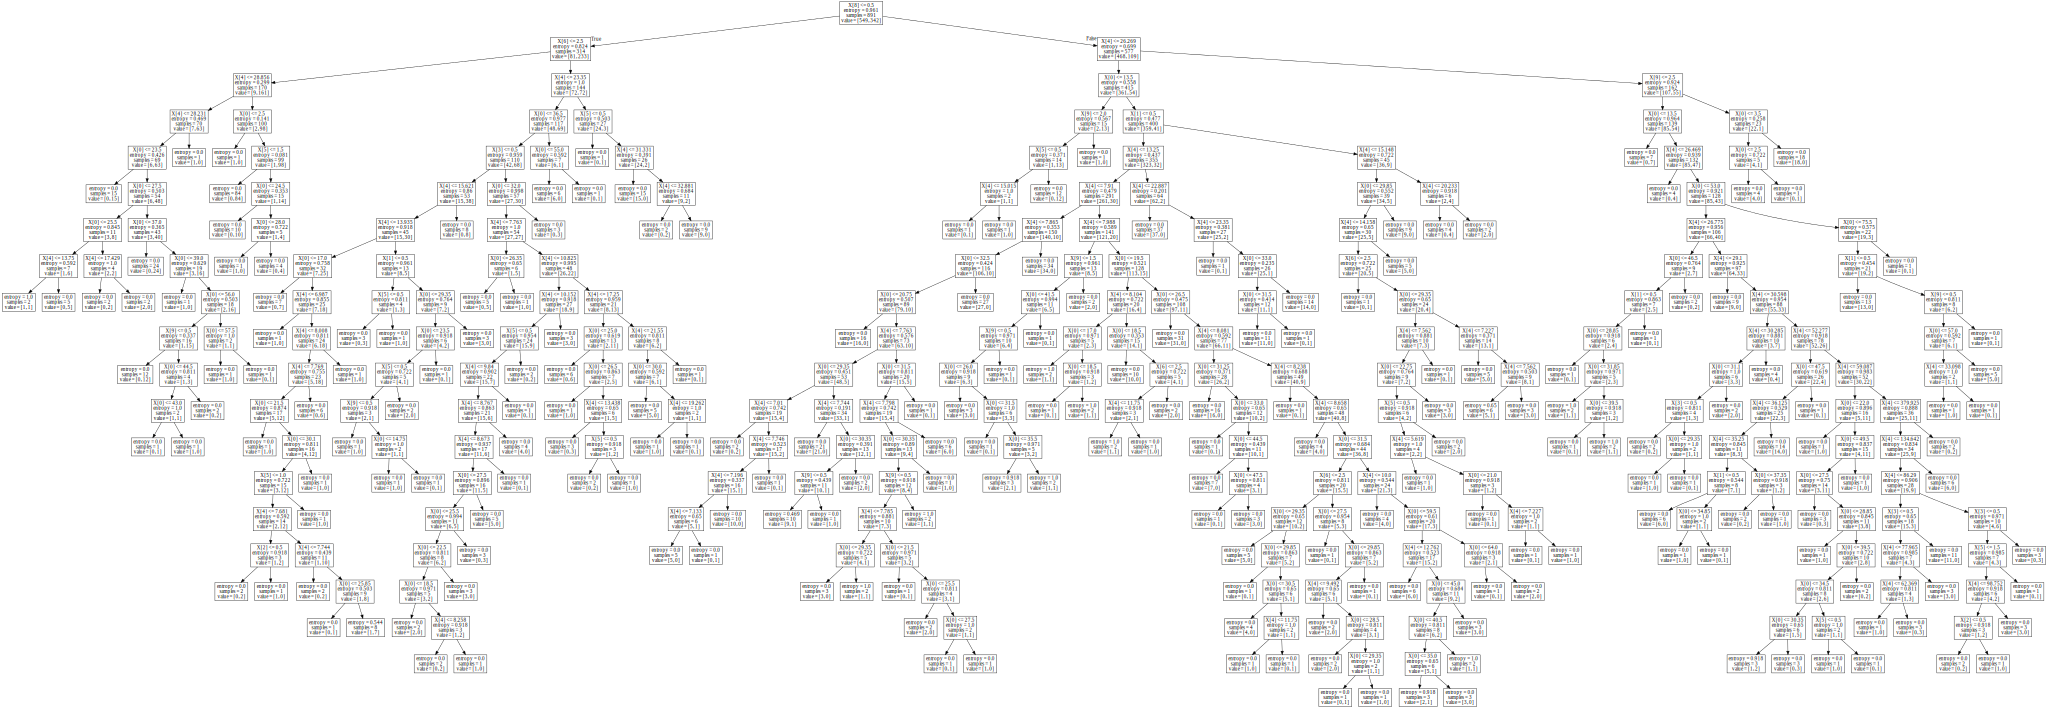

In [98]:
dot_data = tree.export_graphviz(clf,)
graph = graphviz.Source(dot_data)
graph.render('titanic',directory='./tree_pdf',)
graph